## Credit Card Fraud Detection Dataset 2023

id: Unique identifier for each transaction

V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)

Amount: The transaction amount

Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!ls

In [2]:
df=pd.read_csv("data/creditcard_2023.csv")

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe().round()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.head().T

In [ ]:
df.amountunto

In [ ]:
columns=list(df.dtypes.index)[1:-1]

In [ ]:
columns

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
!pip install tqdm

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def train(df_train, y_train, C):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [ ]:
def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train["class"].values
        y_val = df_val["class"].values

        dv, model = train(df_train[columns], y_train, C=C)
        y_pred = predict(df_val[columns], dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

In [ ]:
#Best C is 0.1

In [ ]:
dv, model = train(df_full_train[columns], df_full_train["class"].values, C=0.1)
y_pred = predict(df_test[columns], dv, model)

auc = roc_auc_score(df_test["class"].values, y_pred)
auc

In [293]:
import pickle

In [294]:
output_file = f'model.bin'

In [295]:
output_file

'model.bin'

In [296]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

In [297]:
!ls -lh *.bin


-rw-r--r--  1 muratkahraman  staff   187K Oct 31 00:11 model.bin
-rw-r--r--  1 muratkahraman  staff   1.4K Oct 30 22:11 model_C=0.1.bin


In [298]:
input_file = 'model.bin'


In [ ]:
with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)

In [ ]:
model

In [ ]:
credit_card= df.iloc[1000].to_dict()

In [ ]:
X = dv.transform([credit_card])

In [ ]:
y_pred = model.predict_proba(X)[0, 1]

In [ ]:
print('input:', credit_card)
print('output:', y_pred)

In [ ]:
import requests


In [ ]:
url = 'http://localhost:9696/predict'


In [ ]:
credit_card= df[df["class"]==0].iloc[10].to_dict()

In [ ]:
response = requests.post(url, json=credit_card).json()


In [ ]:
response

## Decision Trees and Ensemble Learning

In [230]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [231]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [232]:
del df_train["id"]
del df_val["id"]
del df_test["id"]

In [233]:
y_train = df_train["class"].values
y_val = df_val["class"].values
y_test = df_test["class"].values

In [234]:
del df_train['class']
del df_val['class']
del df_test['class']

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [236]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [237]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [238]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [239]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [240]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.997110755650195

In [241]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [242]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [243]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.9610476452843522
val: 0.9608652377609672


In [244]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- v14 <= -0.02
|   |--- v4 <= -0.71
|   |   |--- class: 0
|   |--- v4 >  -0.71
|   |   |--- class: 1
|--- v14 >  -0.02
|   |--- v4 <= -0.02
|   |   |--- class: 0
|   |--- v4 >  -0.02
|   |   |--- class: 0



## Decision trees parameter tuning

In [ ]:
# selecting max_depth
# selecting min_samples_leaf

In [ ]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

In [ ]:
scores = []

for depth in [10,15,20]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        print('%4s -> %4s -> %.3f' % (depth, s, auc))
        scores.append((depth, s, auc))

In [ ]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

In [ ]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [245]:
dt = DecisionTreeClassifier(max_depth=15, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=10)

In [246]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- v14 <= -0.02
|   |--- v4 <= -0.71
|   |   |--- v10 <= -0.38
|   |   |   |--- v3 <= -0.21
|   |   |   |   |--- class: 1
|   |   |   |--- v3 >  -0.21
|   |   |   |   |--- class: 1
|   |   |--- v10 >  -0.38
|   |   |   |--- v4 <= -0.77
|   |   |   |   |--- v4 <= -0.80
|   |   |   |   |   |--- v7 <= 0.12
|   |   |   |   |   |   |--- v16 <= 1.20
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- v16 >  1.20
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- v7 >  0.12
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- v4 >  -0.80
|   |   |   |   |   |--- v7 <= 0.24
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- v7 >  0.24
|   |   |   |   |   |   |--- v13 <= 0.82
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- v13 >  0.82
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- v4 >  -0.77
|   |   |   |   |--- v5 <= 0.54
|   |   |   |   |   |--- v9 <= 0.57
|   |   |   |   |   |   |--- v26 <= 0.18
|   | 

## Gradient boosting and XGBoost

In [247]:
import xgboost as xgb

In [248]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [201]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [202]:
model

In [203]:
y_pred = model.predict(dval)

In [204]:
roc_auc_score(y_val, y_pred)

0.9988495250079392

In [249]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [250]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [251]:
s = output.stdout

In [252]:
print(s[:200])

[0]	train-auc:0.98949	val-auc:0.98914
[5]	train-auc:0.99761	val-auc:0.99756
[10]	train-auc:0.99905	val-auc:0.99903
[15]	train-auc:0.99952	val-auc:0.99954
[20]	train-auc:0.99977	val-auc:0.99978
[25]	tr


In [253]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [254]:
df_score = parse_xgb_output(output)

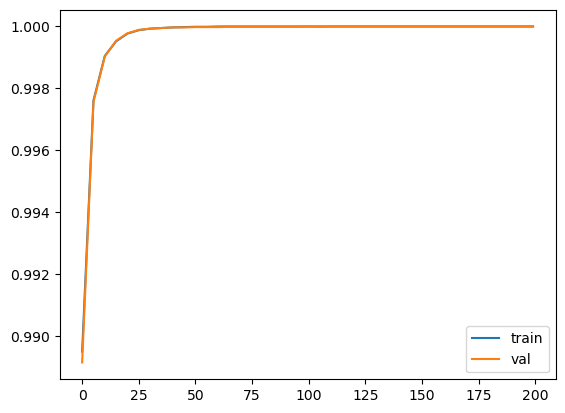

In [255]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

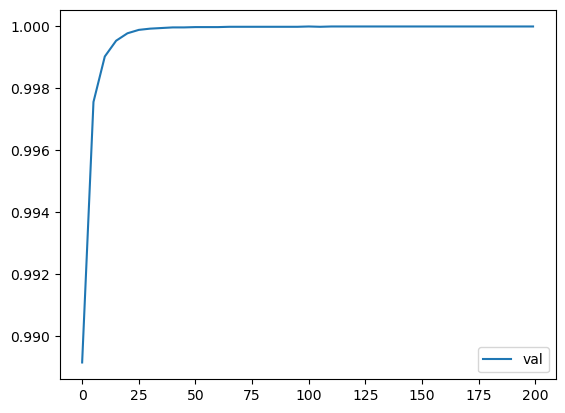

In [256]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()


## XGBoost parameter tuning
Tuning the following parameters:

* eta
* max_depth
* min_child_weight

In [264]:
scores = {}

In [265]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [215]:
scores = {}

In [266]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [217]:
scores = {}


In [218]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [219]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


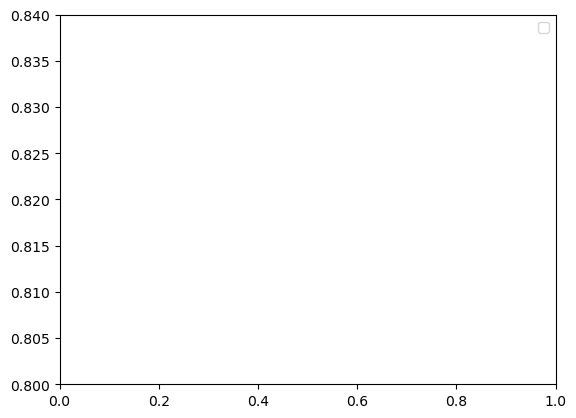

In [221]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

In [222]:
scores = {}


In [223]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [224]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

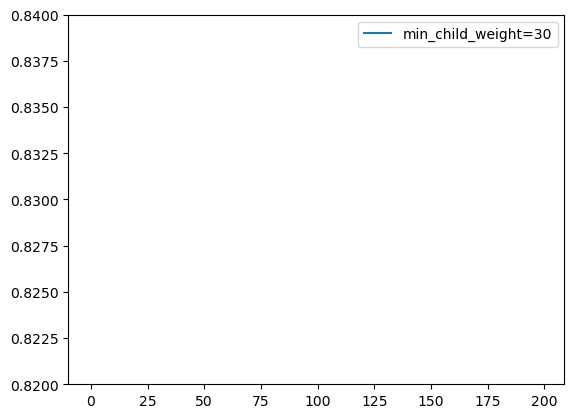

In [225]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

In [267]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

## Selecting the final model

* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model

In [227]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [228]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9896913292055307

In [ ]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

In [268]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [269]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9995673504422244

In [270]:
df_full_train = df_full_train.reset_index(drop=True)


In [271]:
y_full_train = (df_full_train["class"]).values


In [272]:
del df_full_train['class']


In [273]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [280]:
type()

list

In [289]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [290]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [291]:
y_pred = model.predict(dtest)


In [292]:
roc_auc_score(y_test, y_pred)


0.9964757736084197

In [7]:
data_file = 'data/creditcard_2023.csv'
data = pd.read_csv(data_file)

In [8]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [11]:
y = data["class"].values

In [12]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
X = data.drop(columns=["class"])

In [14]:
X

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [15]:
X = X.iloc[:, 1:]

In [16]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [18]:
import pandas as pd
import xgboost as xgb
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import pickle

In [20]:
# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [21]:
# Create lists to store train and validation AUC scores
train_aucs = []
val_aucs = []

# Initialize and fit DictVectorizer

dv = DictVectorizer(sparse=False)
X_encoded = dv.fit_transform(X.to_dict(orient='records'))

print(list(dv.get_feature_names_out()))

['amount', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v2', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']


In [24]:
output_file="test_model.bin"

In [25]:
for train_idx, val_idx in kf.split(X_encoded):
    X_train, X_val = X_encoded[train_idx], X_encoded[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(dv.get_feature_names_out()))
    dval = xgb.DMatrix(X_val, feature_names=list(dv.get_feature_names_out()))

    xgb_params = {
        'eta': 0.1,
        'max_depth': 3,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 2,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=13)
    y_pred_train = model.predict(dtrain)
    y_pred_val = model.predict(dval)

    auc_train = roc_auc_score(y_train, y_pred_train)
    auc_val = roc_auc_score(y_val, y_pred_val)

    train_aucs.append(auc_train)
    val_aucs.append(auc_val)

# Calculate and return the average AUC scores
avg_train_auc = sum(train_aucs) / len(train_aucs)
avg_val_auc = sum(val_aucs) / len(val_aucs)

print("XGBoost K-Fold Cross-Validation")
print(f"\tTrain AUC: {avg_train_auc:.3f}")
print(f"\tValidation AUC: {avg_val_auc:.3f}")

# Train the final model on the full dataset
model = xgb.train(xgb_params, dtrain, num_boost_round=13)

# Save the XGBoost model
# Save the model

with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

print(f'the model is saved to {output_file}')

XGBoost K-Fold Cross-Validation
	Train AUC: 0.988
	Validation AUC: 0.988
the model is saved to test_model.bin


In [35]:
X.to_dict(orient="records")[1000]

{'v1': -0.2639028698066069,
 'v2': -0.1525732764811688,
 'v3': 0.1827283788981841,
 'v4': -0.2534167407096296,
 'v5': 0.5818938643664141,
 'v6': -0.1041843872649159,
 'v7': 0.6308849984849844,
 'v8': -0.1389866725243075,
 'v9': 0.395914495624555,
 'v10': 0.9327688331096036,
 'v11': -1.659171142405512,
 'v12': 0.560241374664014,
 'v13': 0.4251851845057326,
 'v14': 1.0202572328560644,
 'v15': 0.9065666056755164,
 'v16': 0.3618075730347657,
 'v17': 0.3311917170669856,
 'v18': 0.4033939107572041,
 'v19': 0.4208006255758966,
 'v20': -0.5657466084016877,
 'v21': -0.1125122582376631,
 'v22': 0.4464000053015059,
 'v23': 0.5268629462331915,
 'v24': -0.7425215709105263,
 'v25': -0.7035976891581637,
 'v26': -0.8576888198591994,
 'v27': -0.0157900366683944,
 'v28': 0.3666313324560797,
 'amount': 8273.81}

In [45]:
list(data.columns[1:-1].values)

['v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'amount']

In [46]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(dv.get_feature_names_out()))

In [49]:
dtrain

In [50]:
dv.get_feature_names_out()

array(['amount', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16',
       'v17', 'v18', 'v19', 'v2', 'v20', 'v21', 'v22', 'v23', 'v24',
       'v25', 'v26', 'v27', 'v28', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
       'v9'], dtype=object)

In [52]:
model = xgb.train(xgb_params, dtrain, num_boost_round=13)

In [53]:
model.predict()

In [56]:

columns=list(df.columns[1:-1].values)

In [57]:
columns

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [58]:
dicts = df[columns].to_dict(orient='records')
X = dv.transform(dicts)
dtest = xgb.DMatrix(X)
y_pred = model.predict(dtest)

ValueError: training data did not have the following fields: amount, v1, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v2, v20, v21, v22, v23, v24, v25, v26, v27, v28, v3, v4, v5, v6, v7, v8, v9

In [63]:
y_pred

NameError: name 'y_pred' is not defined

In [65]:
dtrain

In [6]:
list(df.columns[1:-1].values)

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df[df["class"]==1]

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
541,541,-0.478427,0.142165,-0.046838,0.683350,0.067820,-0.404898,-0.206496,0.184366,-0.762935,...,0.098977,-0.075191,-0.481489,0.678900,-0.011520,0.409021,0.075859,-0.447139,1534.53,1
623,623,-0.617111,-1.733888,1.150655,0.207829,0.903533,-0.171524,0.551679,-0.167744,0.338861,...,0.153856,0.369734,1.471004,-0.497633,0.377656,-0.328051,-0.512415,-0.013653,10554.68,1
4920,4920,-0.476617,0.088942,0.326333,0.220370,-0.026730,0.432409,0.646165,-0.240646,0.356997,...,-0.223141,-0.851929,0.153117,-0.127032,-0.334872,-1.353308,-0.192302,-0.470796,2785.98,1
6108,6108,-0.832953,-0.024254,-0.260967,0.323532,-0.117119,-0.589167,-0.390612,-0.207889,0.351702,...,0.120451,0.121804,-0.453630,-0.064071,0.331833,-1.671579,-1.060239,1.939783,15897.18,1
6329,6329,1.020308,0.425645,-0.554113,0.868349,2.367343,-0.360087,1.185828,-0.261569,-0.159521,...,-0.258401,-0.661236,-0.663639,-2.536292,2.502489,1.195597,-0.249226,0.254373,3492.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [11]:
df.iloc[541].to_dict()

{'id': 541.0,
 'v1': -0.4784271960990545,
 'v2': 0.1421651242876125,
 'v3': -0.0468380289121661,
 'v4': 0.6833502680870056,
 'v5': 0.0678198572410411,
 'v6': -0.4048984594640247,
 'v7': -0.2064959660918449,
 'v8': 0.1843661072753982,
 'v9': -0.7629347043611346,
 'v10': -0.2283918022491541,
 'v11': 0.6609030198474657,
 'v12': -0.3875197498276417,
 'v13': -0.533249442461466,
 'v14': -0.502265671964952,
 'v15': 0.4051430868662198,
 'v16': -0.0606910405034945,
 'v17': -0.2072367443980979,
 'v18': 0.3056026116425647,
 'v19': 0.1348757242981795,
 'v20': -0.0339211457440372,
 'v21': 0.0989766935994606,
 'v22': -0.0751912083426939,
 'v23': -0.4814893372271562,
 'v24': 0.6788996384076292,
 'v25': -0.0115196803518529,
 'v26': 0.4090207868545027,
 'v27': 0.0758593945999199,
 'v28': -0.4471391388557191,
 'amount': 1534.53,
 'class': 1.0}

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   v1      568630 non-null  float64
 2   v2      568630 non-null  float64
 3   v3      568630 non-null  float64
 4   v4      568630 non-null  float64
 5   v5      568630 non-null  float64
 6   v6      568630 non-null  float64
 7   v7      568630 non-null  float64
 8   v8      568630 non-null  float64
 9   v9      568630 non-null  float64
 10  v10     568630 non-null  float64
 11  v11     568630 non-null  float64
 12  v12     568630 non-null  float64
 13  v13     568630 non-null  float64
 14  v14     568630 non-null  float64
 15  v15     568630 non-null  float64
 16  v16     568630 non-null  float64
 17  v17     568630 non-null  float64
 18  v18     568630 non-null  float64
 19  v19     568630 non-null  float64
 20  v20     568630 non-null  float64
 21  v21     56